In [87]:
import numpy as np 
import matplotlib.pyplot as plt 

import matplotlib as mpl
from matplotlib.transforms import BlendedGenericTransform

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

mpl.rcParams['font.family'] = 'serif'

params = {
    'backend': 'ps',
    'axes.labelsize': 18,
    'font.size': 15,
    'legend.fontsize': 16,
    'xtick.labelsize': 13,
    'ytick.labelsize': 15,
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'ptmrr8re',
}

plt.rcParams.update(params)

La taille des signaux est de (200, 3)
La taille des FFT est de (200, 3)


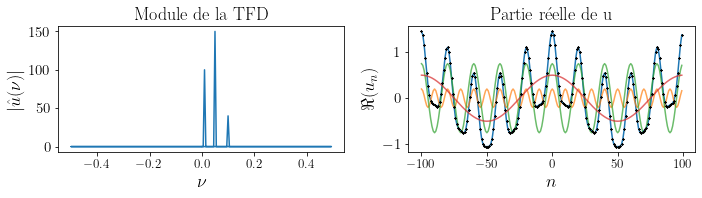

In [105]:
n = np.arange(-100, 100, 1)

a = np.array([0.2, 0.75, 0.5])
nu = np.array([0.1, 0.05, 0.01])

u = a[None,:] * np.exp(1j*2*np.pi*nu[None,:] * n[:, None])
print("La taille des signaux est de {}".format(u.shape))
u_fft = np.fft.fft(u, axis=0)
freq = np.fft.fftfreq(n.shape[-1])
print("La taille des FFT est de {}".format(u_fft.shape))
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(freq, np.abs(u_fft.sum(axis=-1)))
ax[0].set(xlabel=r"$\nu$", ylabel=r"$|\hat{u}(\nu)|$", title="Module de la TFD")
ax[1].plot(n, np.real(u.sum(axis=-1)))

for i in range(u.shape[-1]):
    ax[1].plot(n, np.real(u[:,i]), alpha=0.7)

ax[1].scatter(n, np.real(u.sum(axis=-1)), s=2, c="black", marker="x", zorder=2.5)
ax[1].set(xlabel=r"$n$", ylabel=r"$\Re(u_n)$", title="Partie réelle de u")
plt.tight_layout()
plt.savefig("figures/images/3_ondes_fft_complex.png", dpi=600)



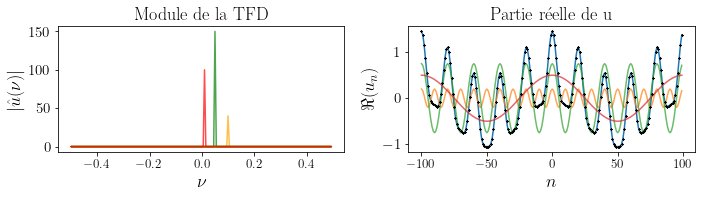

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
color_plots=["orange", "green", "red"]
for i in range(u_fft.shape[-1]):
    ax[0].plot(freq, np.abs(u_fft[:, i]), alpha=0.7, color=color_plots[i])
ax[0].set(xlabel=r"$\nu$", ylabel=r"$|\hat{u}(\nu)|$", title="Module de la TFD")
ax[1].plot(n, np.real(u.sum(axis=-1)))

for i in range(u.shape[-1]):
    ax[1].plot(n, np.real(u[:,i]), alpha=0.7)

ax[1].scatter(n, np.real(u.sum(axis=-1)), s=2, c="black", marker="x", zorder=2.5)
ax[1].set(xlabel=r"$n$", ylabel=r"$\Re(u_n)$", title="Partie réelle de u")
plt.tight_layout()
plt.savefig("figures/images/3_ondes_fft_complex_solution.png", dpi=600)

La taille des signaux est de (200, 3)
La taille des FFT est de (200, 3)


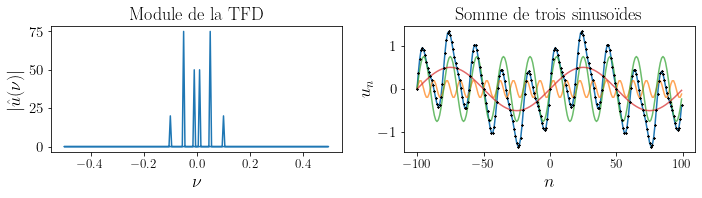

In [104]:
n = np.arange(-100, 100, 1)

a = np.array([0.2, 0.75, 0.5])
nu = np.array([0.1, 0.05, 0.01])

u = a[None,:] * np.exp(1j*2*np.pi*nu[None,:] * n[:, None])
u = np.imag(u)
print("La taille des signaux est de {}".format(u.shape))
u_fft = np.fft.fft(u, axis=0)
freq = np.fft.fftfreq(n.shape[-1])
print("La taille des FFT est de {}".format(u_fft.shape))
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(freq, np.abs(u_fft.sum(axis=-1)))
ax[0].set(xlabel=r"$\nu$", ylabel=r"$|\hat{u}(\nu)|$", title="Module de la TFD")
ax[1].plot(n, np.real(u.sum(axis=-1)))

for i in range(u.shape[-1]):
    ax[1].plot(n, np.real(u[:,i]), alpha=0.7)

ax[1].scatter(n, np.real(u.sum(axis=-1)), s=2, c="black", marker="x", zorder=2.5)
ax[1].set(xlabel=r"$n$", ylabel=r"$u_n$", title="Somme de trois sinusoïdes")
plt.tight_layout()
plt.savefig("figures/images/3_ondes_fft_imag.png", dpi=600)

La taille des signaux est de (10,)
La taille des FFT est de (512,)


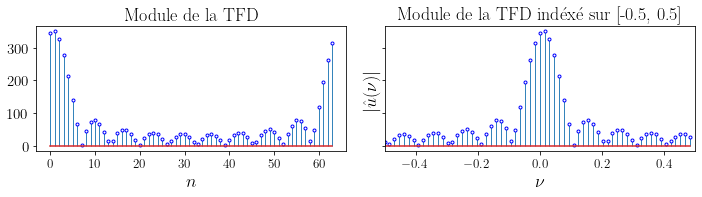

In [334]:
# génération du signal
Fe = 10000. # fréquence d'échantillonnage
f0 = 100. # en Hz
a0 = 1.

# durée d'observation
N = 10
# N = 1000
# ici votre code 
nu0 = f0/Fe 

t = np.arange(N)/Fe 

u = a0 * np.exp(1j * 2 * np.pi* f0 * t + 2*np.pi*np.random.rand())
#u*= np.hanning(N)
print("La taille des signaux est de {}".format(u.shape))
Nfft = 2**9
u_fft = np.fft.fft(u, Nfft)

decim_factor = 8

nu = np.fft.fftfreq(Nfft)
print("La taille des FFT est de {}".format(u_fft.shape))
fig, ax = plt.subplots(1, 2, figsize=(10,3), sharey=True)
config1= [nu0-0.1, nu0+0.1]
config2 = [-0.5, 0.5]
ax[1].set(xlabel=r"$\nu$", ylabel=r"$|\hat{u}(\nu)|$", 
          xlim=config2, title="Module de la TFD indéxé sur [-0.5, 0.5]")
markerline, stemline, baseline, = ax[1].stem(nu[::decim_factor], np.abs(u_fft[::decim_factor]), markerfmt='o')
plt.setp(markerline, markersize=3, color="white", markeredgecolor= "blue")
plt.setp(stemline, linewidth=0.9)
nu = np.arange(len(u_fft[::decim_factor])) 
ax[0].set(xlabel=r"$n$", title="Module de la TFD")
         
markerline, stemline, baseline, = ax[0].stem(nu, np.abs(u_fft[::decim_factor]), markerfmt='o')
plt.setp(markerline, markersize=3, color="white", markeredgecolor= "blue")
plt.setp(stemline, linewidth=0.9)
# ax[1].plot(t, np.real(u))
# ax[1].scatter(n, np.real(u.sum(axis=-1)), s=2, c="black", marker="x", zorder=2.5)
#  ax[1].set(xlabel=r"$n$", ylabel=r"$\Re(u_n)$", title="Partie réelle de u")
plt.tight_layout()
plt.savefig("figures/images/tfd_index.png", dpi=600)

0.123
La taille des signaux est de (8,)
La taille des FFT est de (60,)
0.11666666666666667 7.9667865807137686
0.13333333333333333 7.9117634407357045


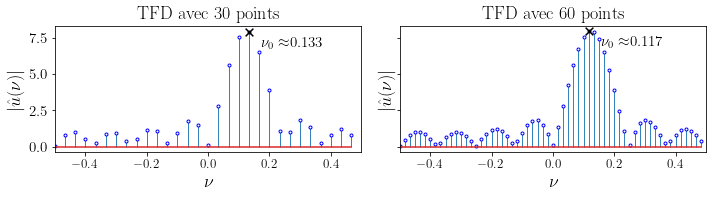

In [364]:
# génération du signal
Fe = 10000. # fréquence d'échantillonnage
f0 = 1230. # en Hz
a0 = 1.

# durée d'observation
N = 8
# N = 1000
# ici votre code 
nu0 = f0/Fe 
print(nu0)

t = np.arange(N)/Fe 

u = a0 * np.exp(1j * 2 * np.pi* f0 * t)
#u*= np.hanning(N)
print("La taille des signaux est de {}".format(u.shape))
Nfft = 60
u_fft = np.fft.fft(u, Nfft)

decim_factor = 1

nu = np.fft.fftfreq(Nfft)
print("La taille des FFT est de {}".format(u_fft.shape))
fig, ax = plt.subplots(1, 2, figsize=(10,3), sharey=True)
config1= [nu0-0.1, nu0+0.1]
config2 = [-0.5, 0.5]
ax[1].set(xlabel=r"$\nu$",  
          xlim=config2, title="TFD avec {} points".format(len(nu[::decim_factor])))
markerline, stemline, baseline, = ax[1].stem(nu[::decim_factor], np.abs(u_fft[::decim_factor]), markerfmt='o')
position_max = nu[::decim_factor][np.argmax(np.abs(u_fft[::decim_factor]))]
max_value =np.max(np.abs(u_fft[::decim_factor]))
# ax[1].plot(nu[::decim_factor], np.abs(u_fft[::decim_factor]), color="blue")
plt.setp(markerline, markersize=3, color="white", markeredgecolor= "blue")
print(position_max, max_value)
ax[1].scatter(position_max, max_value, s=60, c="black", marker='x', zorder=2.5)
ax[1].text(position_max + 0.04, max_value-1, r"$\nu_0 \approx$" + "{0:.3g}".format(position_max))
plt.setp(stemline, linewidth=0.9)

Nfft = 30
u_fft = np.fft.fft(u, Nfft)

decim_factor = 1
nu = np.fft.fftfreq(Nfft)

ax[0].set(xlabel=r"$\nu$", ylabel=r"$|\hat{u}(\nu)|$", 
          xlim=config2, title="TFD avec {} points".format(len(nu[::decim_factor])))
markerline, stemline, baseline, = ax[0].stem(nu[::decim_factor], np.abs(u_fft[::decim_factor]), markerfmt='o')
position_max = nu[::decim_factor][np.argmax(np.abs(u_fft[::decim_factor]))]
max_value =np.max(np.abs(u_fft[::decim_factor]))
# ax[1].plot(nu[::decim_factor], np.abs(u_fft[::decim_factor]), color="blue")
plt.setp(markerline, markersize=3, color="white", markeredgecolor= "blue")
print(position_max, max_value)
ax[0].scatter(position_max, max_value, s=60, c="black", marker='x', zorder=2.5)
ax[0].text(position_max + 0.04, max_value-1, r"$\nu_0 \approx$" + "{0:.3g}".format(position_max))
plt.setp(stemline, linewidth=0.9)

# ax[1].plot(t, np.real(u))
# ax[1].scatter(n, np.real(u.sum(axis=-1)), s=2, c="black", marker="x", zorder=2.5)
#  ax[1].set(xlabel=r"$n$", ylabel=r"$\Re(u_n)$", title="Partie réelle de u")
plt.tight_layout()
plt.savefig("figures/images/tfd_precision.png", dpi=600)